Name: Le Thuc Anh
Email: thucanhle149@gmail.com

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [42]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/drive/MyDrive/CNN/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    # label_mode='categorical',
    # class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(img_height, img_width),
    # shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    # interpolation='bilinear',
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    # label_mode='categorical',
    # class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(img_height, img_width),
    # shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    # interpolation='bilinear',
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

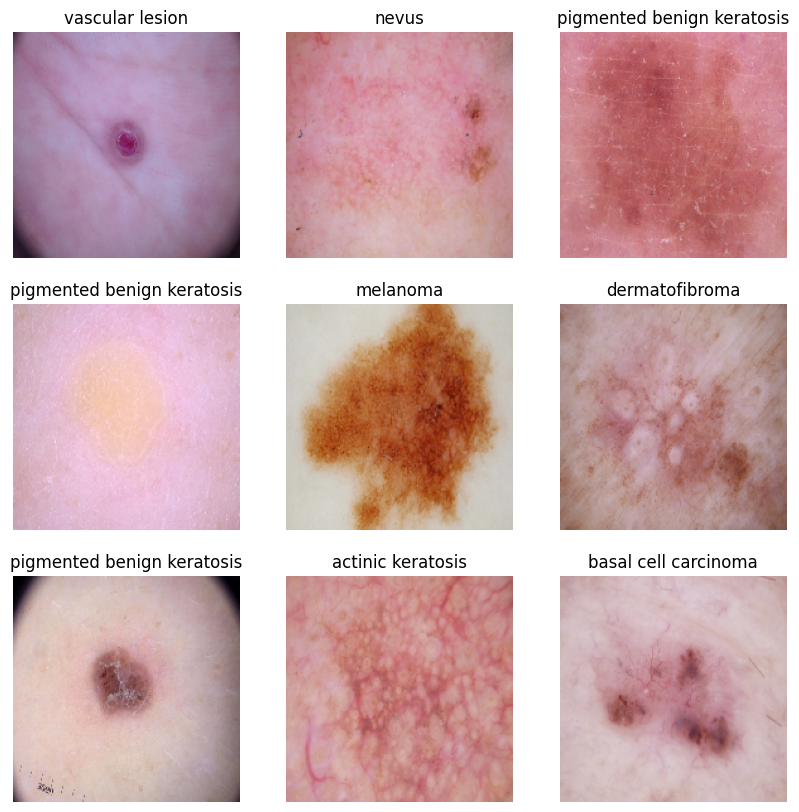

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
# One-hot encoding for both dataset
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                        

### Train the model

In [ ]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 205s 3s/step - loss: 2.0085 - accuracy: 0.3309 - val_loss: 1.5668 - val_accuracy: 0.4676
Epoch 2/20
56/56 [==============================] - 4s 75ms/step - loss: 1.5107 - accuracy: 0.4738 - val_loss: 1.4549 - val_accuracy: 0.5123
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 1.3770 - accuracy: 0.5257 - val_loss: 1.4899 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 4s 75ms/step - loss: 1.3319 - accuracy: 0.5151 - val_loss: 1.5191 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 1.2970 - accuracy: 0.5597 - val_loss: 1.5120 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 1.3304 - accuracy: 0.5201 - val_loss: 1.5596 - val_accuracy: 0.4855
Epoch 7/20
56/56 [==============================] - 4s 76ms/step - loss: 1.1322 - accuracy: 0.5926 - val_loss: 1.5616 - val_accuracy: 0.5145
Epoch 8/20
56

### Visualizing training results

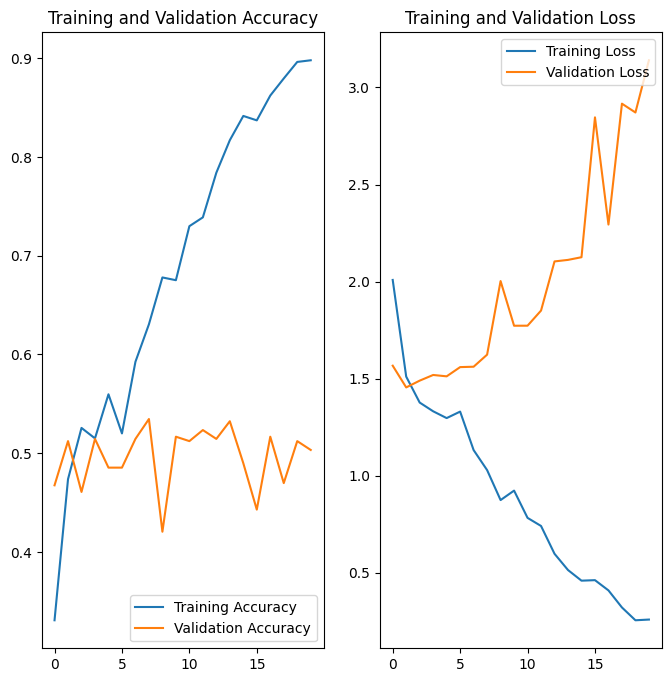

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
loss, accuracy = model.evaluate(train_ds, verbose = 1)
loss_val, accuracy_val = model.evaluate(val_ds, verbose = 1)

print("Accuracy Train:", accuracy)
print("Accuracy Validation:", accuracy_val)
print("Loss Train:", loss)
print("Loss Validation:", loss_val)

14/14 [==============================] - 0s 19ms/step - loss: 3.1400 - accuracy: 0.5034
Accuracy Train: 0.9308035969734192
Accuracy Validation: 0.5033556818962097
Loss Train: 0.19902372360229492
Loss Validation: 3.1400089263916016


The model has lower accuracy in Validation dataset than in the Train dataset so it's overfit.

In [ ]:
!pip install Augmentor

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

import Augmentor
data_dir_aug = pathlib.Path('/content/drive/MyDrive/CNN/Augmentor')


p = Augmentor.Pipeline(data_dir_aug)
p.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
p.sample(5)



Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Augmentor/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x789F60415E70>: 100%|██████████| 5/5 [00:05<00:00,  1.15s/ Samples]


In [ ]:
import os
import cv2

image_folder = '/content/drive/MyDrive/CNN/Augmentor/output'
images = []

for filename in os.listdir(image_folder):
    img = cv2.imread(os.path.join(image_folder, filename))
    if img is not None:
        images.append(img)


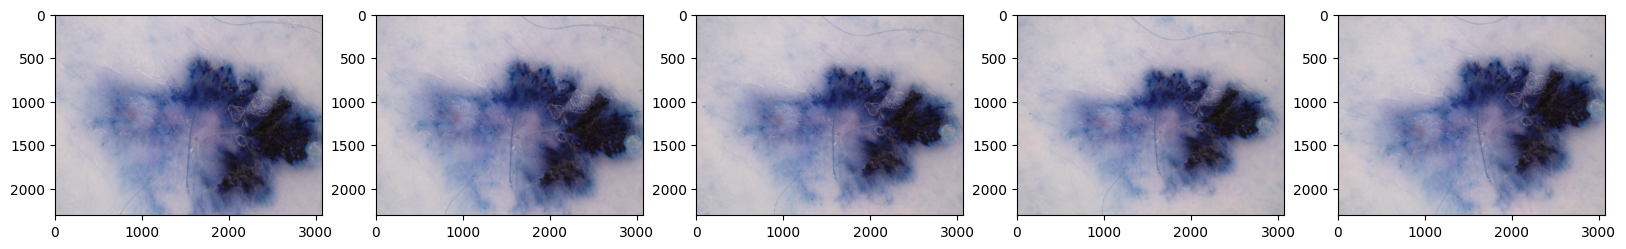

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), int(columns), int(i + 1))
    plt.imshow(image)

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_13 (Activation)  (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                      

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
 ## your training code

epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 106ms/step - loss: 2.4252 - accuracy: 0.1819 - val_loss: 2.0928 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 6s 101ms/step - loss: 1.9893 - accuracy: 0.2232 - val_loss: 1.8875 - val_accuracy: 0.2931
Epoch 3/20
56/56 [==============================] - 6s 101ms/step - loss: 1.8719 - accuracy: 0.3013 - val_loss: 1.8646 - val_accuracy: 0.2931
Epoch 4/20
56/56 [==============================] - 6s 103ms/step - loss: 1.7746 - accuracy: 0.3499 - val_loss: 1.6806 - val_accuracy: 0.3893
Epoch 5/20
56/56 [==============================] - 6s 102ms/step - loss: 1.6737 - accuracy: 0.4001 - val_loss: 1.6851 - val_accuracy: 0.3982
Epoch 6/20
56/56 [==============================] - 6s 103ms/step - loss: 1.6449 - accuracy: 0.3973 - val_loss: 1.7381 - val_accuracy: 0.3557
Epoch 7/20
56/56 [==============================] - 6s 101ms/step - loss: 1.6405 - accuracy: 0.4029 - val_loss: 1.5519 - val_accuracy: 0.4273
Epoch 

### Visualizing the results

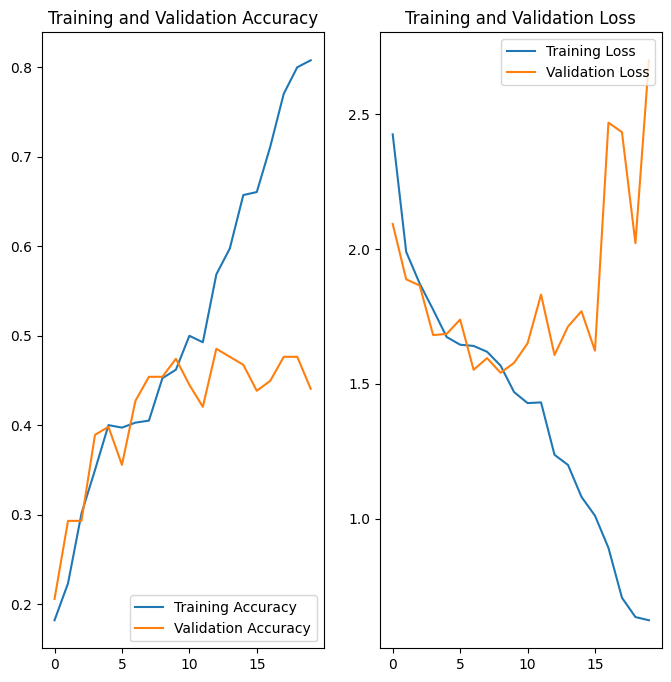

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose = 1)
loss_val, accuracy_val = model.evaluate(val_ds, verbose = 1)

print("Accuracy Train:", accuracy)
print("Accuracy Validation:", accuracy_val)
print("Loss Train:", loss)
print("Loss Validation:", loss_val)

14/14 [==============================] - 0s 19ms/step - loss: 2.6998 - accuracy: 0.4407
Accuracy Train: 0.9001116156578064
Accuracy Validation: 0.44071587920188904
Loss Train: 0.33849912881851196
Loss Validation: 2.6998255252838135


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After putting some dropout layers, the model is still overfit.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
# Import the images of each class
image_dict = {}
for classname in class_names:
    image_dict[classname] = len(list(data_dir_train.glob(classname+'/*.jpg')))
print(image_dict)

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [ ]:
# Take the values count of each class
df = pd.DataFrame()
counts = list(image_dict.values())
df['class'] = class_names
df['count'] = counts

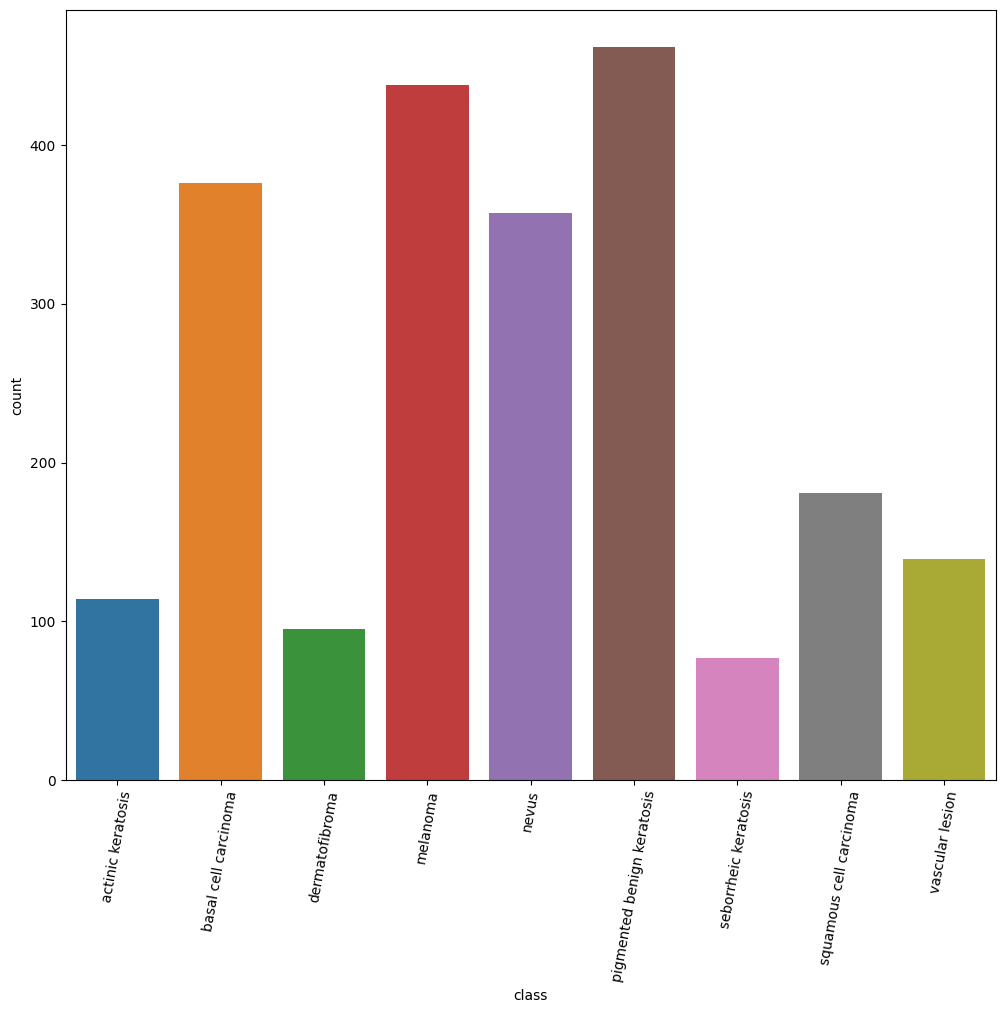

In [43]:
# Plotting the bar graph for each class
plt.figure(figsize=(12, 10))
sns.barplot(x = df['class'], y = df['count'], data = df)
plt.xticks(rotation=80)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples? **seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples? **pigmented benign keratosis**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [44]:
import Augmentor

path_to_training_dataset="/content/drive/MyDrive/CNN/Train/"
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789E5C197010>: 100%|██████████| 500/500 [00:17<00:00, 27.90 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789E5C5CE6E0>: 100%|██████████| 500/500 [00:17<00:00, 28.06 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x789E5C14E200>: 100%|██████████| 500/500 [00:20<00:00, 23.96 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x789E5C1C5A80>: 100%|██████████| 500/500 [01:15<00:00,  6.62 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x789E5C184B20>: 100%|██████████| 500/500 [01:19<00:00,  6.30 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x789E5C203F70>: 100%|██████████| 500/500 [00:17<00:00, 28.99 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x789E5C1C48B0>: 100%|██████████| 500/500 [00:36<00:00, 13.57 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789E5C1964A0>: 100%|██████████| 500/500 [00:18<00:00, 27.14 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789E5C5CE6B0>: 100%|██████████| 500/500 [00:17<00:00, 29.16 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [45]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [46]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0000482.jpg_27cbf38b-63d4-4f9e-a730-7c884304beb4.jpg',
 '/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0010900.jpg_51fecd90-0035-45f5-ab7f-8a3e96f2e5e1.jpg',
 '/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0000547.jpg_8690aa1e-9231-41e4-9b38-1459a930db54.jpg',
 '/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0000288.jpg_f1dbbf66-e03e-4506-99c6-7b72f954f56e.jpg',
 '/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0010583.jpg_605e06a7-8f63-4292-aa37-6fec93ff16cf.jpg',
 '/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0000172.jpg_17de561b-f5b1-4f9b-a48f-709ad81ae91a.jpg',
 '/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0000511.jpg_2b545904-f8b4-43e8-b580-8e22f12ded17.jpg',
 '/content/drive/MyDrive/CNN/Train/melanoma/output/melanoma_original_ISIC_0011151.jpg_723ccac7-09

In [47]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [48]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [49]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [50]:
df2['Label'].value_counts()

melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
seborrheic keratosis          500
vascular lesion               500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [62]:

batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [61]:
data_dir_train= pathlib.Path('/content/drive/MyDrive/CNN/Train')
# "path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [63]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [64]:
# Take the values count of each class
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))

#### **Todo:** Create your model (make sure to include normalization)

In [65]:
## your code goes here
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [66]:
## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [67]:
## Your code goes here, use 50 epochs.
epochs = 50
batch_size = 32

history = model.fit(train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 45s 246ms/step - loss: 2.5201 - accuracy: 0.1421 - val_loss: 2.1873 - val_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 38s 219ms/step - loss: 2.1866 - accuracy: 0.1439 - val_loss: 2.1868 - val_accuracy: 0.1411
Epoch 3/50
169/169 [==============================] - 40s 230ms/step - loss: 2.1905 - accuracy: 0.1422 - val_loss: 2.1874 - val_accuracy: 0.1418
Epoch 4/50
169/169 [==============================] - 40s 234ms/step - loss: 2.1726 - accuracy: 0.1417 - val_loss: 2.1724 - val_accuracy: 0.1477
Epoch 5/50
169/169 [==============================] - 37s 211ms/step - loss: 2.1576 - accuracy: 0.1510 - val_loss: 2.1273 - val_accuracy: 0.1730
Epoch 6/50
169/169 [==============================] - 36s 207ms/step - loss: 2.1257 - accuracy: 0.1716 - val_loss: 2.1048 - val_accuracy: 0.1901
Epoch 7/50
169/169 [==============================] - 41s 234ms/step - loss: 1.9787 - accuracy: 0.2493 - val_loss: 1.8897 - val_ac

#### **Todo:**  Visualize the model results

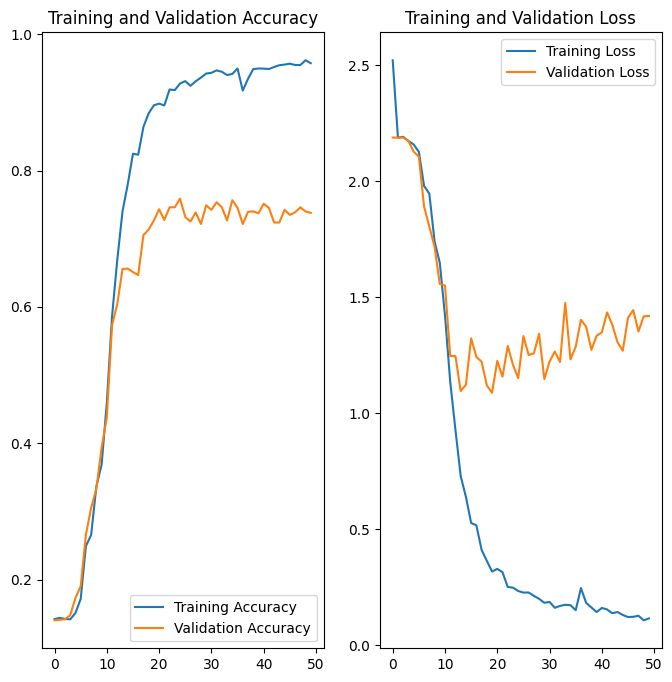

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
loss, accuracy = model.evaluate(train_ds, verbose = 1)
loss_val, accuracy_val = model.evaluate(val_ds, verbose = 1)

print("Accuracy Train:", accuracy)
print("Accuracy Validation:", accuracy_val)
print("Loss Train:", loss)
print("Loss Validation:", loss_val)

43/43 [==============================] - 8s 153ms/step - loss: 1.4190 - accuracy: 0.7379
Accuracy Train: 0.9556750655174255
Accuracy Validation: 0.7379361391067505
Loss Train: 0.1251755803823471
Loss Validation: 1.4190276861190796


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



After using Augmentor, the model has better results, less overfitting.